<a href="https://colab.research.google.com/github/Ezraliano/Data_Science_Projects/blob/main/Machine_Learning_Singapore_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
dataset = pd.read_csv('singapore_airlines_reviews.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               9999 non-null   object
 6   helpful_votes       10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


Data Preparation

In [5]:
# Text Cleaning, Lowercasing, Tokenization
def clean_text(text):
    # Lowercase text
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenization and removing stopwords
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [9]:
import nltk
nltk.download('stopwords')  # Ensure this line aligns to the left margin

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
import nltk
from nltk.corpus import stopwords

print(stopwords.words('english')[:10])  # Print the first 10 English stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [11]:
# Apply text cleaning to 'text' column
dataset['cleaned_text'] = dataset['text'].apply(clean_text)

In [12]:
# Labeling Sentimen based on rating
def label_sentiment_by_rating(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

dataset['sentiment_rating'] = dataset['rating'].apply(label_sentiment_by_rating)

In [13]:
# Modeling Sentimen Analysis
# Lexicon-Based Sentiment Analysis with TextBlob
def lexicon_based_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [14]:
# Apply lexicon-based sentiment analysis
dataset['sentiment_textblob'] = dataset['cleaned_text'].apply(lexicon_based_sentiment)


In [15]:
# Combine both sentiment labels for comparison
dataset['final_sentiment'] = dataset['sentiment_textblob']

<ipython-input-16-5d49c240fa4b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='final_sentiment', palette='Set2')


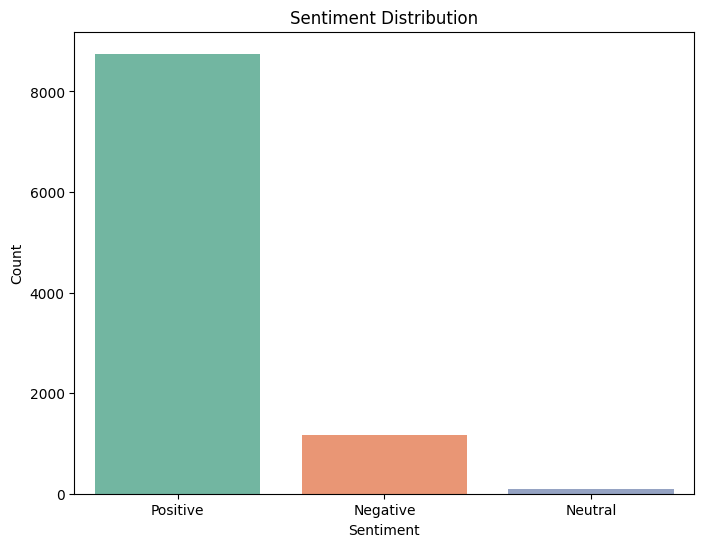

In [16]:
# Implementation and Visualization
# Visualization Distribution Sentimen
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='final_sentiment', palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

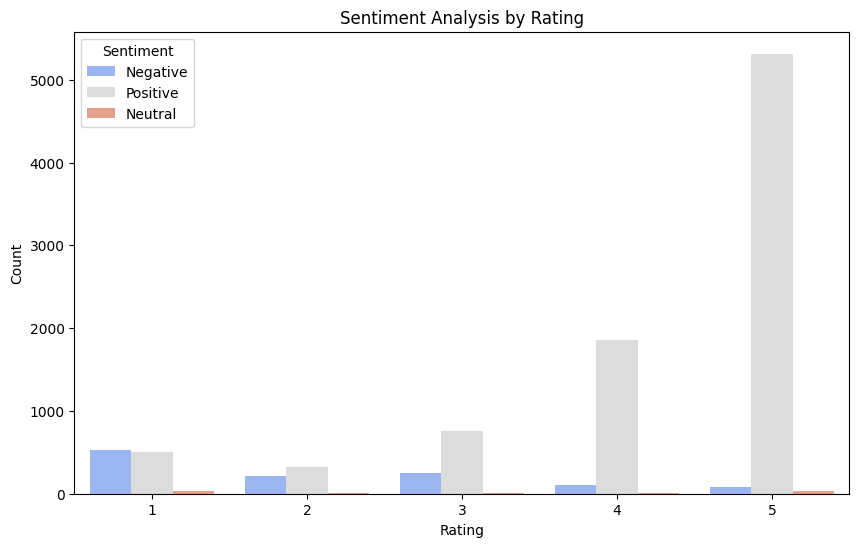

In [17]:
# Distribution Sentimen based on rating
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='rating', hue='final_sentiment', palette='coolwarm')
plt.title('Sentiment Analysis by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

In [25]:
# Word Cloud for Positive and Negative Reviews (optional)
from wordcloud import WordCloud

positive_text = ' '.join(review for review in dataset[dataset['final_sentiment'] == 'Positive']['cleaned_text'])
negative_text = ' '.join(review for review in dataset[dataset['final_sentiment'] == 'Negative']['cleaned_text'])

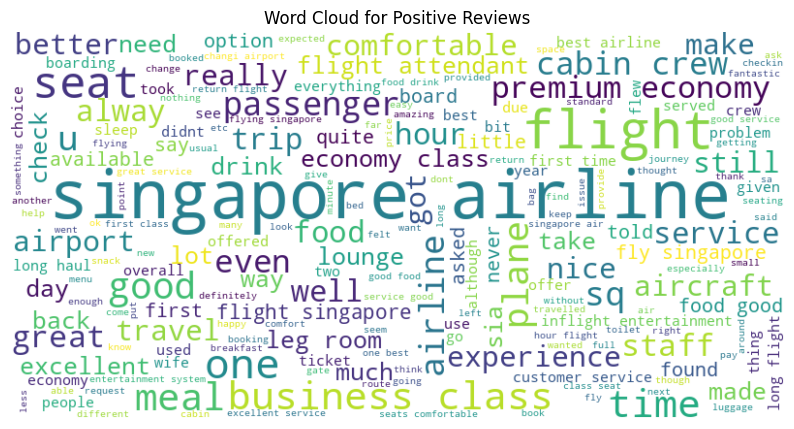

In [26]:
# Positive Reviews Word Cloud
plt.figure(figsize=(10, 6))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

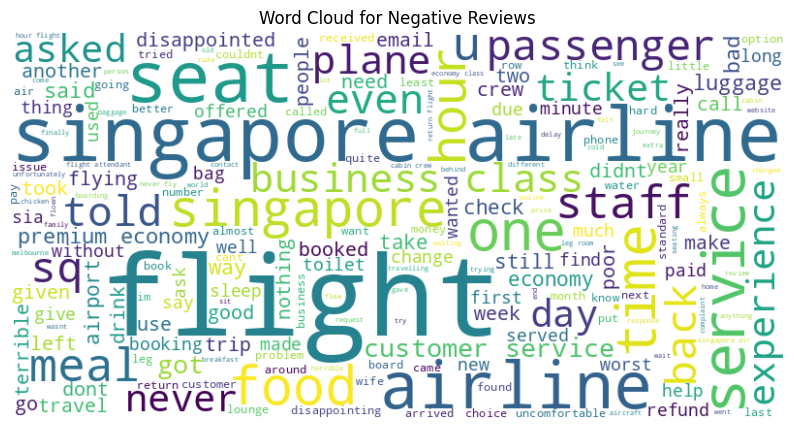

In [27]:
# Negative Reviews Word Cloud
plt.figure(figsize=(10, 6))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [28]:
# Saving dataset
dataset.to_csv('singapore_airlines_sentimen_reviews.csv', index=True)

Machine Learning Model

In [29]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [30]:
# Data Preparation for Machine Learning
# Map sentiment to numerical values
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
dataset['sentiment_numeric'] = dataset['final_sentiment'].map(sentiment_mapping)

In [31]:
# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['cleaned_text'])  # Features
y = dataset['sentiment_numeric']  # Target variable

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Model Training with Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [34]:
# Model Prediction
y_pred = model.predict(X_test)

In [35]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
# Displaying the results
print(f"Accuracy of the Naive Bayes model: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Accuracy of the Naive Bayes model: 0.87

Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       241
     Neutral       0.00      0.00      0.00        15
    Positive       0.87      1.00      0.93      1744

    accuracy                           0.87      2000
   macro avg       0.29      0.33      0.31      2000
weighted avg       0.76      0.87      0.81      2000



In [37]:
# Save the model for future use (optional)
import joblib
joblib.dump(model, 'naive_bayes_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [38]:
accuracy, report

(0.872,
 '              precision    recall  f1-score   support\n\n    Negative       0.00      0.00      0.00       241\n     Neutral       0.00      0.00      0.00        15\n    Positive       0.87      1.00      0.93      1744\n\n    accuracy                           0.87      2000\n   macro avg       0.29      0.33      0.31      2000\nweighted avg       0.76      0.87      0.81      2000\n')